In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy  import  stats


In [9]:
df = pd.read_csv('diabetes.csv')

In [14]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [67]:
df.shape

(768, 9)

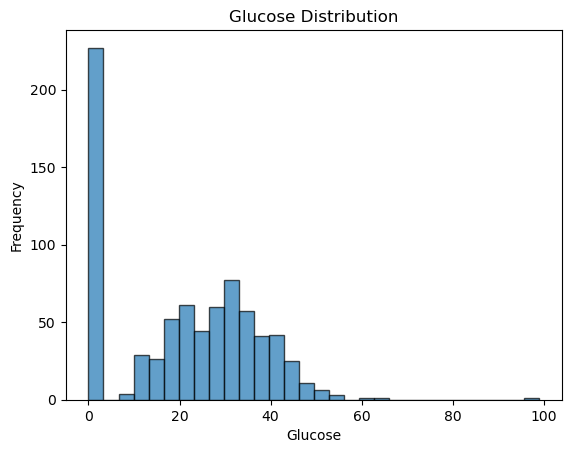

In [124]:
#Plot histrogram of age column
plt.hist(df['SkinThickness'], bins=30, edgecolor= 'k', alpha=0.7)
plt.title('Glucose Distribution')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()


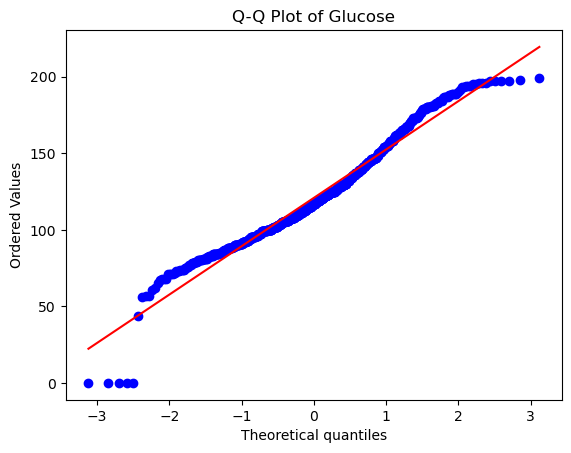

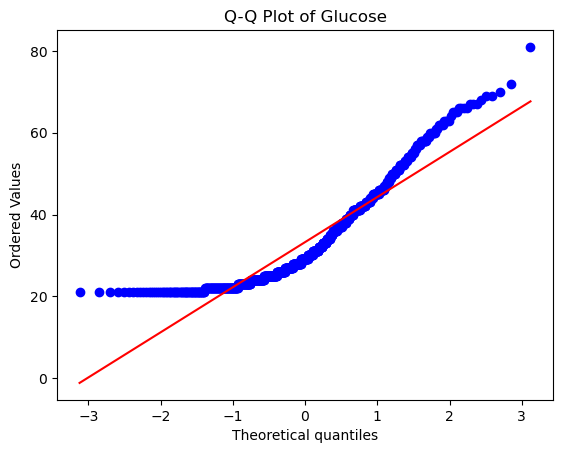

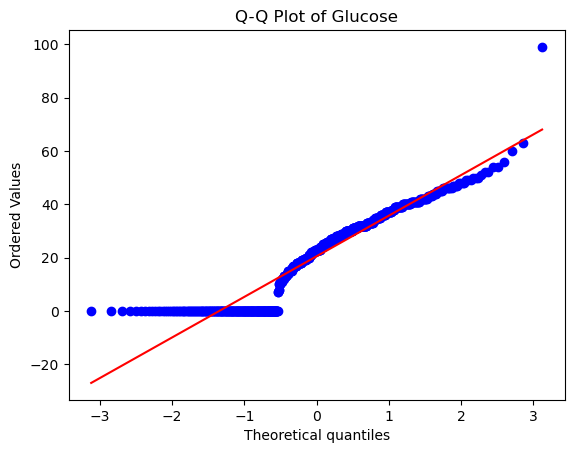

In [134]:
#Generate a Q-Q plot
stats.probplot(df['Glucose'], dist='norm',plot=plt)
plt.title('Q-Q Plot of Glucose')
plt.show()

stats.probplot(df['Age'], dist='norm',plot=plt)
plt.title('Q-Q Plot of Glucose')
plt.show()

stats.probplot(df['SkinThickness'], dist='norm',plot=plt)
plt.title('Q-Q Plot of Glucose')
plt.show()

In [132]:
#Perform the Shapiro-Wilk test
stat_shapiro, p_shapiro = stats.shapiro(df['Age'])
print('Shapiro Wilk Test')
print(f'Statistics= { stat_shapiro}, p= { p_shapiro}')



Shapiro Wilk Test
Statistics= 0.8747668643940426, p= 2.4022741290400888e-24


In [81]:
#Interpret the result
alpha=0.05
if p_shapiro > alpha:
    print('Sample looks Gaussian (fail to reject H0')
else:
    print('Sample does not look Gaussian (reject H0')

print('Skewness', df[''].skew())



Sample does not look Gaussian (reject H0
Skewness 1.1295967011444805


# Central limit Theorum

In [150]:
sample_means=[]
n_samples = 100
sample_size = 50

In [152]:
for _ in range(n_samples):
    sample = df['Age'].sample(n=sample_size, replace=True)
    sample_means.append(sample.mean())

Text(0, 0.5, 'Frequency')

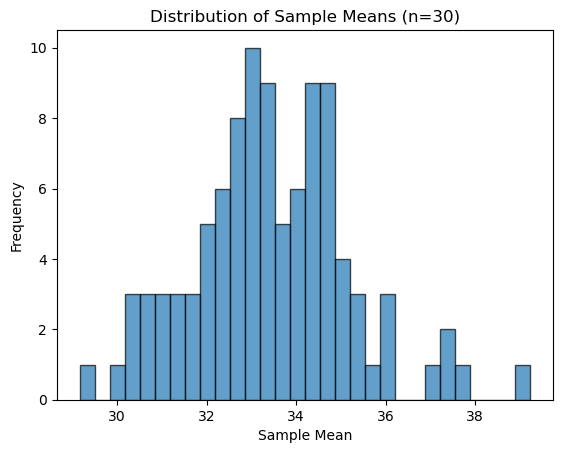

In [154]:
# Plot the distribution of sample means
plt.hist(sample_means,bins=30,edgecolor='k',alpha=0.7)
plt.title('Distribution of Sample Means (n=30)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')


Text(0.5, 1.0, 'Q-Q plot of sample means')

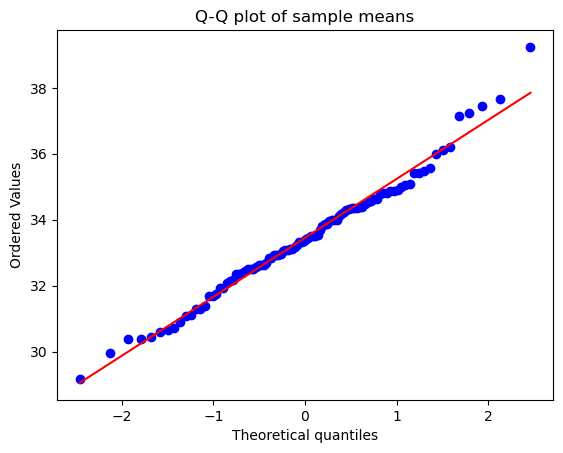

In [155]:
# Generate Q-Q plot for the sample means

stats.probplot(sample_means,dist="norm",plot=plt)
plt.title('Q-Q plot of sample means')


In [158]:
# Perform the shapiro-wilk test on sample means
shapiro_test = stats.shapiro(sample_means)
print('Shapiro-wilk p-value:',shapiro_test.pvalue)

Shapiro-wilk p-value: 0.34251858221592146


In [160]:
#Interpret the result
if shapiro_test.pvalue < 0.05:
    print("data doesnot follow normal distribution.")
else:
    print("the data may be normally distributed,but the q-q plot can provide further insights")

the data may be normally distributed,but the q-q plot can provide further insights


In [ ]:
# Excercise: Run CLT on the total_bill amount od the tips dataset